**Cleaning Of Data/ Feature Engineering**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Renewable_Energy.csv')

# Melt the dataframe
df_long = pd.melt(df, id_vars=['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Technology', 'Energy_Type', 'Unit'],
                  value_vars=[f'F{year}' for year in range(2000, 2024)],
                  var_name='Year',
                  value_name='Value')

# Clean the 'Year' column
df_long['Year'] = df_long['Year'].str.lstrip('F').astype(int)

# Filter for relevant data
filtered_df = df_long[df_long['Technology'].isin(['Solar energy', 'Wind energy'])]

In [4]:
filtered_df

,ObjectId,Country,ISO2,ISO3,Indicator,Technology,Energy_Type,Unit,Year,Value
6,7,Advanced Economies,NaN,AETMP,Electricity Generation,Solar energy,Total Renewable,Gigawatt-hours (GWh),2000,1224.520
7,8,Advanced Economies,NaN,AETMP,Electricity Installed Capacity,Solar energy,Total Renewable,Megawatt (MW),2000,1140.913
8,9,Advanced Economies,NaN,AETMP,Electricity Generation,Wind energy,Total Renewable,Gigawatt-hours (GWh),2000,23575.989
9,10,Advanced Economies,NaN,AETMP,Electricity Installed Capacity,Wind energy,Total Renewable,Megawatt (MW),2000,13094.115
14,15,"Afghanistan, Islamic Rep. of",AF,AFG,Electricity Generation,Solar energy,Total Renewable,Gigawatt-hours (GWh),2000,NaN
...,...,...,...,...,...,...,...,...,...,...
49471,2046,"Yemen, Rep. of",YE,YEM,Electricity Installed Capacity,Solar energy,Total Renewable,Megawatt (MW),2023,289.995
49478,2053,Zambia,ZM,ZMB,Electricity Generation,Solar energy,Total Renewable,Gigawatt-hours (GWh),2023,NaN
49479,2054,Zambia,ZM,ZMB,Electricity Installed Capacity,Solar energy,Total Renewable,Megawatt (MW),2023,133.099
49486,2061,Zimbabwe,ZW,ZWE,Electricity Generation,Solar energy,Total Renewable,Gigawatt-hours (GWh),2023,NaN


**Exploratory Analysis**

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Renewable_Energy.csv')

# Melt the dataframe to convert it from a wide to a long format
df_long = pd.melt(df, id_vars=['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Technology', 'Energy_Type', 'Unit'],
                  value_vars=[f'F{year}' for year in range(2000, 2024)],
                  var_name='Year',
                  value_name='Value')

# Clean the 'Year' column by removing the 'F' and converting to an integer
df_long['Year'] = df_long['Year'].str.lstrip('F').astype(int)

# Filter for the global totals ('WLD') for 'Solar energy' and 'Wind energy'
filtered_df = df_long[(df_long['ISO3'] == 'WLD') & (df_long['Technology'].isin(['Solar energy', 'Wind energy']))]

# Perform descriptive statistics for the 'Value' column, grouped by Technology and Indicator
descriptive_stats = filtered_df.groupby(['Technology', 'Indicator'])['Value'].describe()

# Display the resulting summary table
print(descriptive_stats)

                                             count           mean  \
Technology   Indicator                                              
Solar energy Electricity Generation           23.0  261686.246174   
             Electricity Installed Capacity   24.0  279311.096792   
Wind energy  Electricity Generation           23.0  648767.451174   
             Electricity Installed Capacity   24.0  334491.064917   

                                                       std        min  \
Technology   Indicator                                                  
Solar energy Electricity Generation          374392.982676   1312.127   
             Electricity Installed Capacity  392096.750287   1215.700   
Wind energy  Electricity Generation          631548.009165  30944.468   
             Electricity Installed Capacity  307044.794366  16963.675   

                                                      25%          50%  \
Technology   Indicator                                                  

**Data Visualization Figure 1**

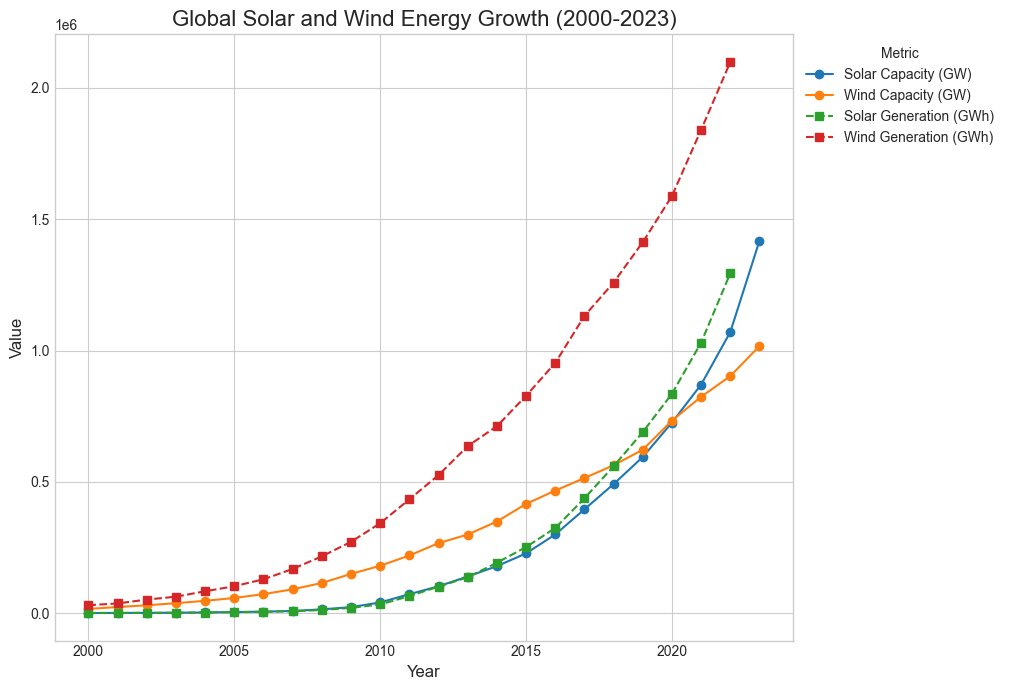

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Renewable_Energy.csv')

# Melt the dataframe to convert it from a wide to a long format
df_long = pd.melt(df, id_vars=['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Technology', 'Energy_Type', 'Unit'],
                  value_vars=[f'F{year}' for year in range(2000, 2024)],
                  var_name='Year',
                  value_name='Value')

# Clean the 'Year' column by removing the 'F' and converting to an integer
df_long['Year'] = df_long['Year'].str.lstrip('F').astype(int)

# Filter for the global totals ('WLD') for 'Solar energy' and 'Wind energy'
filtered_df = df_long[(df_long['ISO3'] == 'WLD') & (df_long['Technology'].isin(['Solar energy', 'Wind energy']))]

# Separate data for plotting
solar_capacity = filtered_df[(filtered_df['Technology'] == 'Solar energy') & (filtered_df['Indicator'] == 'Electricity Installed Capacity')]
wind_capacity = filtered_df[(filtered_df['Technology'] == 'Wind energy') & (filtered_df['Indicator'] == 'Electricity Installed Capacity')]
solar_generation = filtered_df[(filtered_df['Technology'] == 'Solar energy') & (filtered_df['Indicator'] == 'Electricity Generation')]
wind_generation = filtered_df[(filtered_df['Technology'] == 'Wind energy') & (filtered_df['Indicator'] == 'Electricity Generation')]

# Create the plot
plt.figure(figsize=(12, 7))
plt.style.use('seaborn-v0_8-whitegrid')

plt.plot(solar_capacity['Year'], solar_capacity['Value'], label='Solar Capacity (GW)', marker='o', linestyle='-')
plt.plot(wind_capacity['Year'], wind_capacity['Value'], label='Wind Capacity (GW)', marker='o', linestyle='-')
plt.plot(solar_generation['Year'], solar_generation['Value'], label='Solar Generation (GWh)', marker='s', linestyle='--')
plt.plot(wind_generation['Year'], wind_generation['Value'], label='Wind Generation (GWh)', marker='s', linestyle='--')

plt.title('Global Solar and Wind Energy Growth (2000-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Metric', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Save the plot to a file
plt.savefig('renewable_energy_growth.png')
plt.show()

**Data Visualization Figure 2**

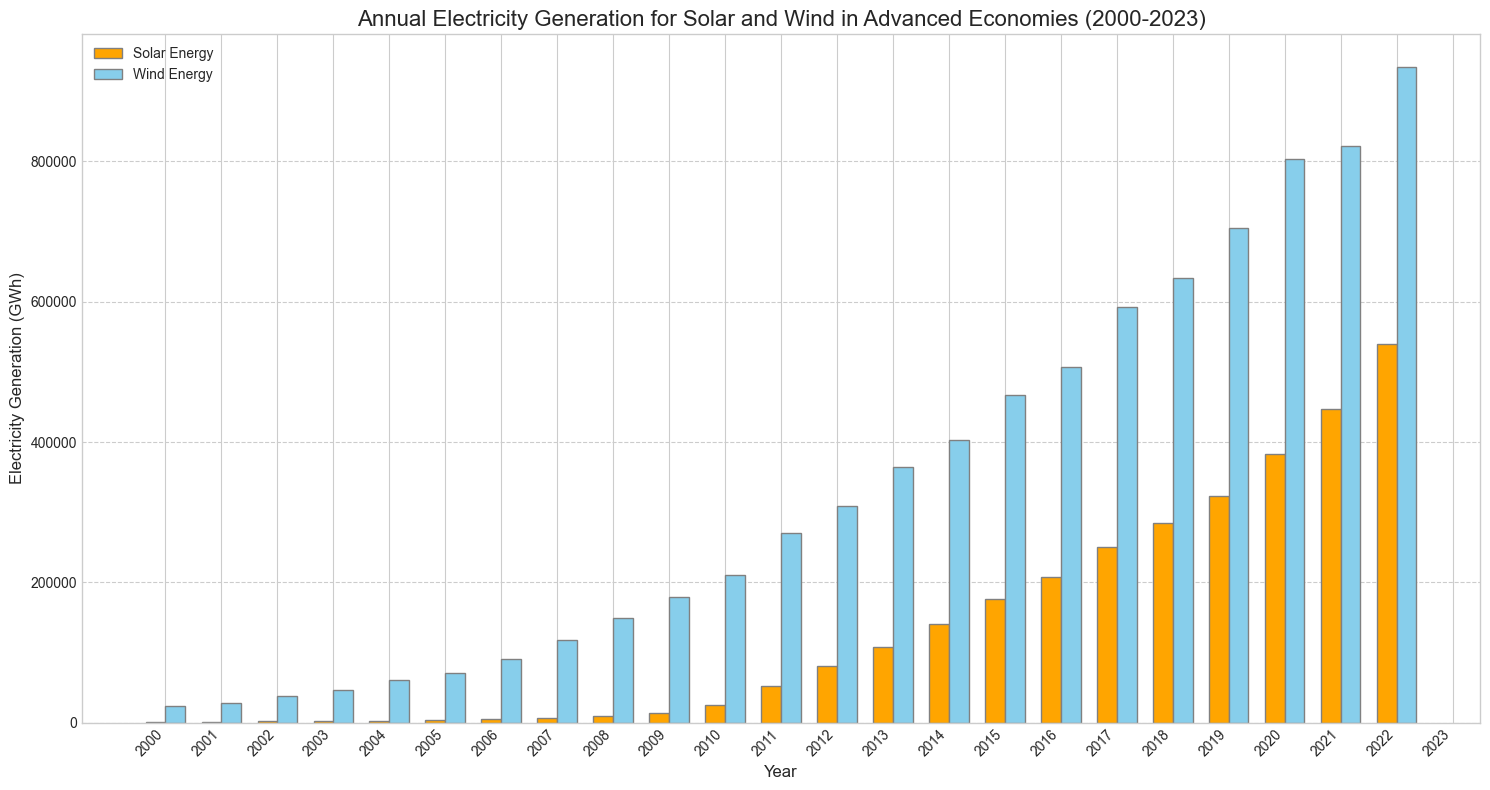

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
try:
    df = pd.read_csv('Renewable_Energy.csv')
except FileNotFoundError:
    print("Error: The file 'Renewable_Energy.csv' was not found. Please ensure it is in the same directory.")
    exit()

# Filter for global electricity generation data for solar and wind energy
# We will use 'Advanced Economies' for this example to match the data in the report.
country_name = 'Advanced Economies'
technologies = ['Solar energy', 'Wind energy']

# Filter data for the specified country and technologies
generation_data = df[
    (df['Country'] == country_name) &
    (df['Indicator'] == 'Electricity Generation') &
    (df['Technology'].isin(technologies))
]

# Check if data was found
if generation_data.empty:
    print(f"No data found for {country_name} and specified technologies.")
    exit()

# Identify year columns (F2000 to F2023)
years = [f'F{year}' for year in range(2000, 2024)]

# Prepare the data for plotting by unpivoting the year columns
plot_data = generation_data.melt(
    id_vars=['Technology'],
    value_vars=years,
    var_name='Year',
    value_name='Generation_GWh'
)

# Convert 'Year' from 'F2000' format to an integer for plotting
plot_data['Year'] = plot_data['Year'].str.replace('F', '').astype(int)

# Pivot the data to have years as the index and technologies as columns
bar_data = plot_data.pivot(index='Year', columns='Technology', values='Generation_GWh').reset_index()

# Create the plot
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 8))

# Define bar width and positions
bar_width = 0.35
r1 = np.arange(len(bar_data['Year']))
r2 = [x + bar_width for x in r1]

# Create the bars for each technology
plt.bar(r1, bar_data['Solar energy'], color='orange', width=bar_width, edgecolor='grey', label='Solar Energy')
plt.bar(r2, bar_data['Wind energy'], color='skyblue', width=bar_width, edgecolor='grey', label='Wind Energy')

# Add plot titles and labels
plt.title(f'Annual Electricity Generation for Solar and Wind in {country_name} (2000-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Electricity Generation (GWh)', fontsize=12)
plt.xticks([r + bar_width / 2 for r in range(len(bar_data['Year']))], bar_data['Year'], rotation=45, ha='right')
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


**Hypothesis Testing**

In [1]:
import pandas as pd
from scipy import stats
import os

# Set file path for the CSV
file_path = 'Renewable_Energy.csv'

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
else:
    try:
        # Load the dataset
        df = pd.read_csv(file_path)

        # --- Data Preparation ---
        # Filter for Solar and Wind electricity generation
        solar_gen = df[(df['Technology'] == 'Solar energy') & (df['Indicator'] == 'Electricity Generation')]
        wind_gen = df[(df['Technology'] == 'Wind energy') & (df['Indicator'] == 'Electricity Generation')]

        # Get the yearly columns (F2000 to F2023)
        year_cols = [f'F{year}' for year in range(2000, 2024)]

        # Extract the yearly generation data and transpose it for easier calculation
        solar_gen_values = solar_gen[year_cols].iloc[0] if not solar_gen.empty else pd.Series()
        wind_gen_values = wind_gen[year_cols].iloc[0] if not wind_gen.empty else pd.Series()
        
        # Drop columns with all NaN values to avoid errors in calculation
        solar_gen_values.dropna(inplace=True)
        wind_gen_values.dropna(inplace=True)

        # --- Calculate Annual Growth Rates ---
        # Calculate the year-over-year percentage change
        solar_growth_rates = solar_gen_values.pct_change() * 100
        wind_growth_rates = wind_gen_values.pct_change() * 100

        # Drop the first value which is NaN due to pct_change()
        solar_growth_rates.dropna(inplace=True)
        wind_growth_rates.dropna(inplace=True)

        # --- Perform the Two-Sample T-Test ---
        # The alternate hypothesis is that solar growth is greater than wind growth.
        # This requires a one-tailed t-test.
        # `equal_var=False` is used because the variances of the growth rates are likely different.
        t_statistic, p_value = stats.ttest_ind(solar_growth_rates, wind_growth_rates, equal_var=False, alternative='greater')

        # --- Interpret the Results ---
        print("--- Hypothesis Test Results ---")
        print(f"Mean Solar Annual Growth Rate: {solar_growth_rates.mean():.2f}%")
        print(f"Mean Wind Annual Growth Rate: {wind_growth_rates.mean():.2f}%")
        print(f"T-statistic: {t_statistic:.4f}")
        print(f"P-value: {p_value:.4f}")

        # Determine if the results are significant
        alpha = 0.05
        if p_value < alpha:
            print(f"\nConclusion: The p-value ({p_value:.4f}) is less than the significance level (alpha = {alpha}).")
            print("We reject the null hypothesis.")
            print("There is a significant difference, and the data supports the alternate hypothesis that solar energy's growth rate is more rapid than wind energy's.")
        else:
            print(f"\nConclusion: The p-value ({p_value:.4f}) is greater than the significance level (alpha = {alpha}).")
            print("We fail to reject the null hypothesis.")
            print("There is not enough evidence to conclude that solar energy's growth rate is significantly more rapid than wind energy's.")

    except Exception as e:
        print(f"An error occurred: {e}")
        print("Please check your CSV file for correct column names and data format.")



--- Hypothesis Test Results ---
Mean Solar Annual Growth Rate: 33.43%
Mean Wind Annual Growth Rate: 18.53%
T-statistic: 2.8544
P-value: 0.0041

Conclusion: The p-value (0.0041) is less than the significance level (alpha = 0.05).
We reject the null hypothesis.
There is a significant difference, and the data supports the alternate hypothesis that solar energy's growth rate is more rapid than wind energy's.
